# SSH model

<img src="ssh_chain_bulkedge.svg" width="1000" >


In this notebook we explore the the SSH model depicted above. We build the tight-binding model, calculate the spectrum and inspect the wavefunction of a finite system and explore the energy eigenstates and $d$-space behaviour of the model.

In [1]:
# We import pylab and interactive widgets 
%pylab inline
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


## Bulk system in momentum space and $d$-space

First let us define the $d(k)$ vector as functions of the intracell $v$ and intercell $w$ hopping parameters.
$$\mathbf{d}(k)=\left(\begin{array}{c}
v+w\cos(k)\\
w\sin(k)\\
0\\
\end{array}\right) $$

In [2]:
def dk(k,v,w,**kwargs):
    '''
    This function returns the d vector of the SSH model.
    '''
    return [v+w*cos(k),w*sin(k),0]

Now we can write a simple interactive plot to explore the $\mathbf{d}(k)$ curve and the spectrum $E_\pm(k)=\pm\left|\mathbf{d}(k)\right|$ as we tune the hopping parameters.

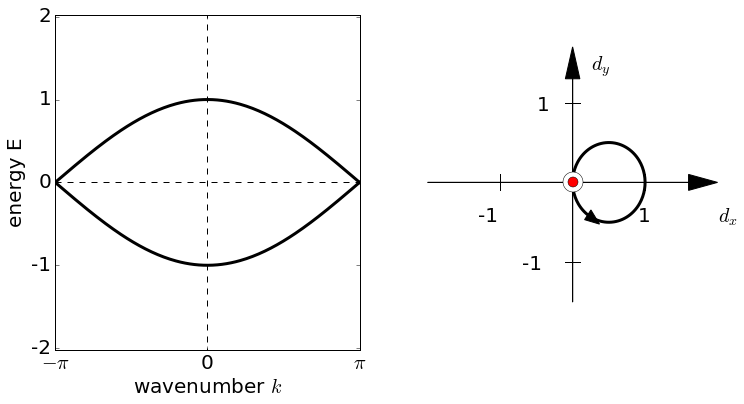

In [3]:
figsize(12,6)
kran=linspace(-pi,pi,200)
@interact(v=(-1,1,0.1),w=(-1,1,0.1))
def ekdk(v=0.5,w=0.5):
    dx,dy=dk(kran,v,w)[:2]
    #
    #-- This part makes the k-space figure--
    #
    subplot(121)
    plot(kran,sqrt(dx**2+dy**2),'k-',linewidth=3)           # This creates the
    plot(kran,-sqrt(dx**2+dy**2),'k-',linewidth=3)          # two bandlines
    #just to make it look like in the book    
    ylabel('energy E',fontsize=20);
    xlabel(r'wavenumber $k$',fontsize=20);
    xlim(-pi,pi);xticks([-pi,0,pi],['$-\pi$','0','$\pi$'],fontsize=20)
    ylim(-2.02,2.02);yticks([-2,-1,0,1,2],['-2','-1','0','1','2'],fontsize=20);
    plot(kran,0*kran,'k--')
    plot([0,0],[-2.5,2.5],'k--')

    #
    #--This part makes the d-space figure--
    #
    subplot(122)
    plot(dx,dy,'k-',linewidth=3)                                # The d(k) line itself 
    arrow(dx[30],dy[30],(dx[31]-dx[29])/30,(dy[31]-dy[29])/30,  # and an arrow
          head_width=0.15, head_length=0.2, fc='k', ec='k')     # showing winding direction
          
    #just to make it look like in the book 
    plot([0],[0],'wo',markersize=20)
    if abs(v)==abs(w):                       # Here we have a simple criterion for 
        plot([0],[0],'ro',markersize=10)     # metallicity
    plot([1,1],[-0.1,0.1],'k')
    plot([-1,-1],[-0.1,0.1],'k')
    plot([-0.1,0.1],[1,1],'k')
    plot([-0.1,0.1],[-1,-1],'k')
    arrow(-2.0,0,3.6,0,head_width=0.2, head_length=0.4, fc='k', ec='k')
    arrow(0,-1.5,0,2*1.4,head_width=0.2, head_length=0.4, fc='k', ec='k')
    xlim(-2.1,2.1)
    ylim(-2.1,2.1)
    axis('off')
    text(.9,-0.5,'1',fontsize=20);text(-1.3,-0.5,'-1',fontsize=20);
    text(-0.5,.9,'1',fontsize=20);text(-0.7,-1.1,'-1',fontsize=20);
    text(0.25,1.4,r'$d_y$',fontsize=20);text(2,-0.5,r'$d_x$',fontsize=20);

## Finite system in real space, spectrum and wavefunctions

First let us define a simple function that generates the Hamiltonian of a finite tight-binding chain for given $v$ and $w$.

In [4]:
def H_SSH_reals(L,v,w):
    '''
    A function to bulid a finite SSH chain.
    The number of unitcells is L.
    As usual v is intracell and w ins intercell hopping.
    '''
    idL=eye(L); # identity matrix of dimension L
    odL=diag(ones(L-1),1);# upper off diagonal matrix with ones of size L
    U=matrix([[0,1],[1,0]]) # intracell
    T=matrix([[0,0],[1,0]]) # intercell
    return kron(idL,v*U)+kron(odL,w*T)+kron(odL,w*T).H

Now we will use the above function to evaluate the spectrum and wavefunctions for $w=1$ as the function of $v$.
We shall consider a small system with only $10$ unitcells. As we will see this is more than enought to visualize all the interesting effects and yet it is small enough for quick calculations. 
First we generate the eigenspectra and the wavefunctions!

In [5]:
L=10;      # Number of unitcells to take
dat=[];
vecdat=[];
vran=linspace(0,3,100) # This array contains the v values
                       # we evaluate the spectrum for.
for v in vran:
    w=1.0;
    H=H_SSH_reals(L,v,w)
    eigdat=eigh(H);      # for a given v here vi calculate the eigensystem (values and vectors)
    dat=append(dat,eigdat[0]);
    vecdat=append(vecdat,eigdat[1]);
    
dat=reshape(dat,[len(vran),2*L]);          # rewraping the data
vecdat=reshape(vecdat,[len(vran),2*L,2*L]) # to be more difestable

Now we can use the above generated data to visualize the spectrum and explore the wavefunctions.

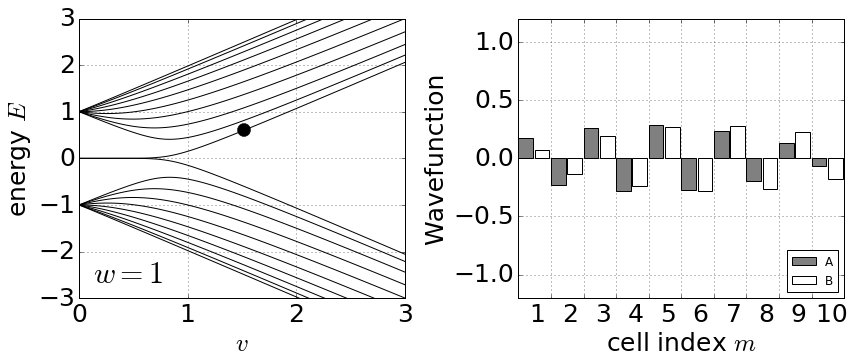

In [6]:
figsize(12,5)
@interact(vi=(0,len(vran)-1),n=(0,19))
def enpsi(vi=50,n=10):
    subplot(121)
    # Plotting the eigenvalues and 
    # a marker showing for which state 
    # we are exploring the wavefunction
    plot(vran,dat,'k-');    
    plot(vran[vi],dat[vi,n],'ko',markersize=13)
    
    # Make it look like the book
    text(0.125,-2.65,r'$w=1$',fontsize=30);
    xlabel(r'$v$',fontsize=25);
    xticks([0,1,2,3],fontsize=25)
    ylabel(r'energy $E$',fontsize=25);
    yticks(fontsize=25)
    ylim(-2.99,2.99)
    grid()

    subplot(122)
    # Plotting the sublattice resolved wavefunction
    bar(array(range(0,2*L,2)),  real(array(vecdat[vi][0::2,n].T)),0.9,color='grey',label='A')  # sublattice A
    bar(array(range(0,2*L,2))+1,real(array(vecdat[vi][1::2,n].T)),0.9,color='white',label='B') # sublattice B
    
    # Make it look like the book
    xticks(2*(array(range(10))),['     '+str(i) for i in array(range(11))[1:]],fontsize=25)
    ylim(-1.2,1.2)
    yticks(linspace(-1,1,5),fontsize=25)
    ylabel('Wavefunction',fontsize=25)
    grid()
    legend(loc='lower right')
    xlabel(r'cell index $m$',fontsize=25);
    
    tight_layout()